In [192]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick

print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numpy: {np.__version__}')
print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de seaborn: {sns.__version__}')
print(f'Versión de yellowbrick: {yellowbrick.__version__}')

Versión de pandas: 2.2.2
Versión de numpy: 2.0.2
Versión de scikit-learn (sklearn): 1.6.1
Versión de seaborn: 0.13.2
Versión de yellowbrick: 1.5


In [193]:
datos = pd.read_csv('/content/drive/MyDrive/df_modelo_final.csv')

In [194]:
# REALIZAMOS ANALISIS EXPLORATORIO
datos.head(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [195]:
# Eliminar la columna customerID
datos = datos.drop(columns=['customerID'])

In [196]:
datos

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7039,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7040,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7041,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [197]:
datos.shape

(7043, 20)

In [198]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [199]:
round(datos.describe(), 2)

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7043.00,7043.00,7043.00,7032.00
mean,0.16,32.37,64.76,2283.30
std,0.37,24.56,30.09,2266.77
min,0.00,0.00,18.25,18.80
25%,0.00,9.00,35.50,401.45
50%,0.00,29.00,70.35,1397.48
75%,0.00,55.00,89.85,3794.74
max,1.00,72.00,118.75,8684.80


In [200]:
datos.describe(include='object')

,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,5174,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


In [201]:
# Convertir la variable object Churn a binaria
datos['Churn'] = datos['Churn'].map({'Yes': 1, 'No': 0})

In [202]:
# Columnas categóricas (object o category)
categorical_cols = datos.select_dtypes(include=['object']).columns.tolist()

# Columnas numéricas (ya son numéricas)
numeric_cols = datos.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categóricas:", categorical_cols)
print("Numéricas:", numeric_cols)

Categóricas: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numéricas: ['Churn', 'SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total']


In [168]:
# ANALISIS GRAFICOS

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

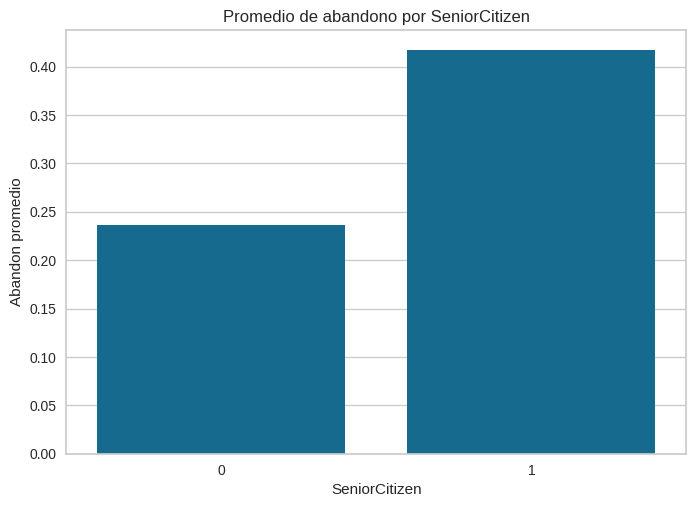

In [170]:
# vamos a ver el promedio de retraso

avg_delay =  datos.groupby('SeniorCitizen')['Churn'].mean().reset_index()
sns.barplot(x='SeniorCitizen', y='Churn', data=avg_delay)
plt.title('Promedio de abandono por SeniorCitizen') # promedio de abandono por genero
plt.xlabel('SeniorCitizen')
plt.ylabel('Abandon promedio')
plt.show()


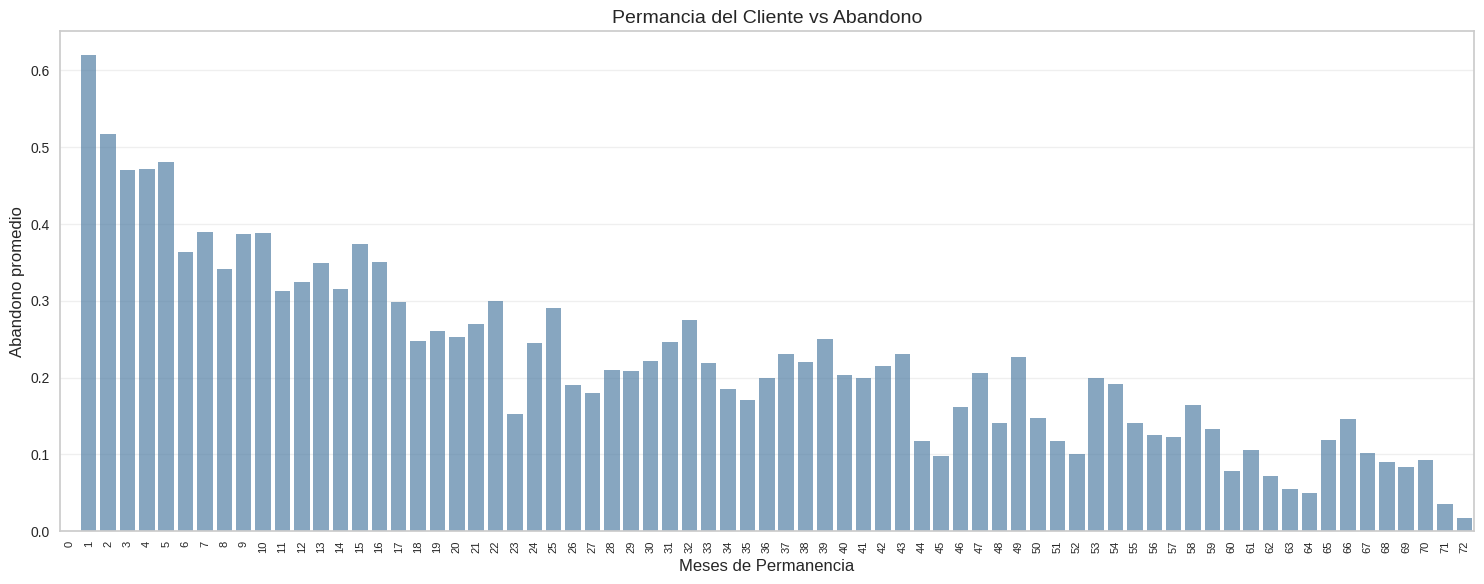

In [203]:
# Haremos una grafica para ver si hay mas abandono vs Permanencia(tenure)
plt.figure(figsize=(15, 6))
avg_delay = datos.groupby('tenure')['Churn'].mean().reset_index()

ax = sns.barplot(x='tenure', y='Churn', data=avg_delay,
                 color='steelblue', alpha=0.7)

plt.title('Permancia del Cliente vs Abandono', fontsize=14)
plt.xlabel('Meses de Permanencia', fontsize=12)
plt.ylabel('Abandono promedio', fontsize=12)

# Rotar etiquetas y ajustar espaciado
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()

# Añadir grid para mejor lectura
plt.grid(axis='y', alpha=0.3)

plt.show()

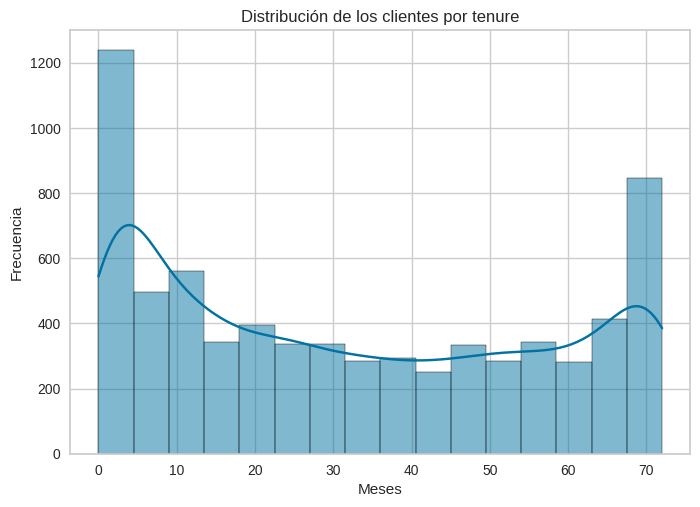

In [204]:
# histograma
# frecuencia por tenure o permanencia en meses.

sns.histplot(data=datos, x='tenure', kde=True)
plt.title('Distribución de los clientes por tenure')
plt.xlabel('Meses')
plt.ylabel('Frecuencia')
plt.show()



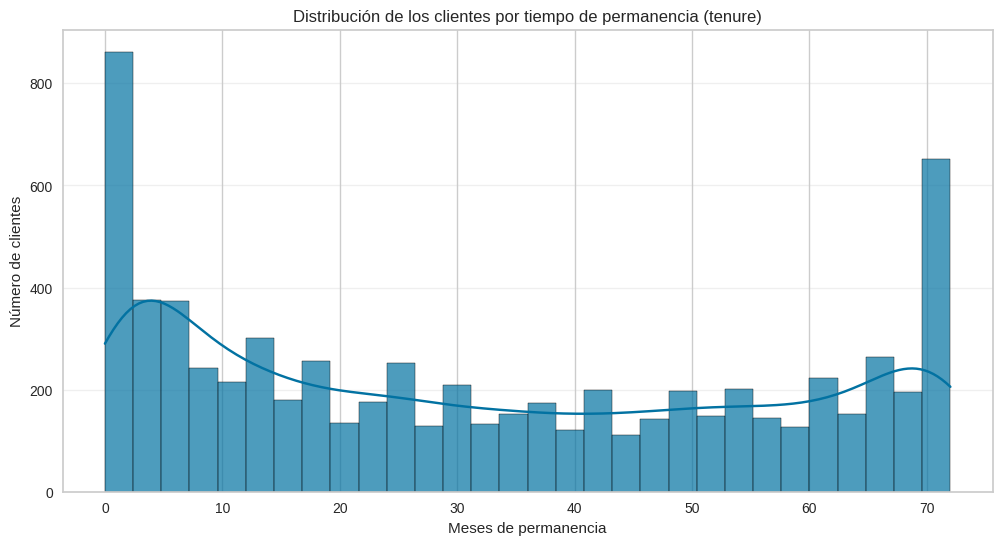

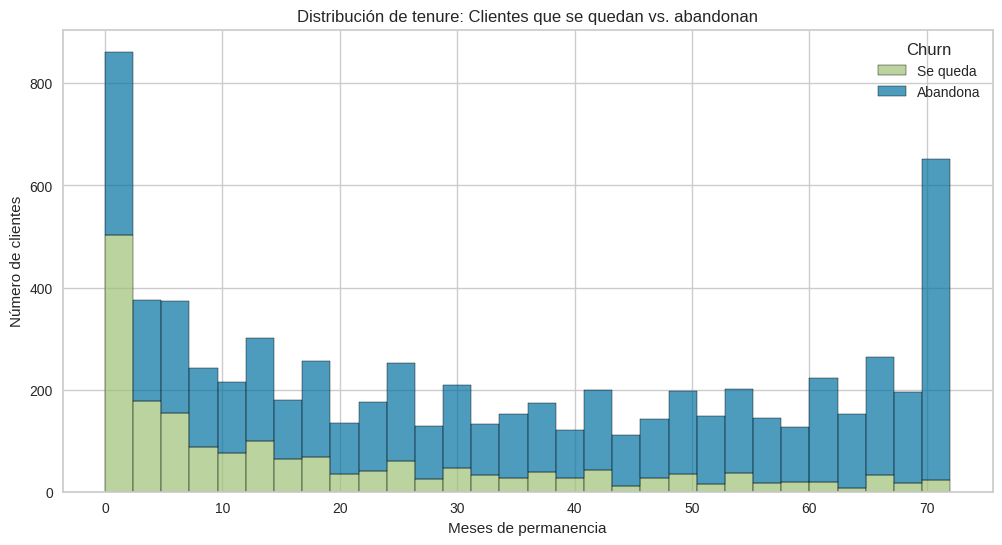

In [205]:
plt.figure(figsize=(12, 6))
sns.histplot(data=datos, x='tenure', bins=30, kde=True, alpha=0.7)
plt.title('Distribución de los clientes por tiempo de permanencia (tenure)')
plt.xlabel('Meses de permanencia')
plt.ylabel('Número de clientes')
plt.grid(axis='y', alpha=0.3)
plt.show()

print()

plt.figure(figsize=(12, 6))
sns.histplot(data=datos, x='tenure', hue='Churn',
             multiple='stack', bins=30, alpha=0.7)
plt.title('Distribución de tenure: Clientes que se quedan vs. abandonan')
plt.xlabel('Meses de permanencia')
plt.ylabel('Número de clientes')
plt.legend(title='Churn', labels=['Se queda', 'Abandona'])
plt.show()

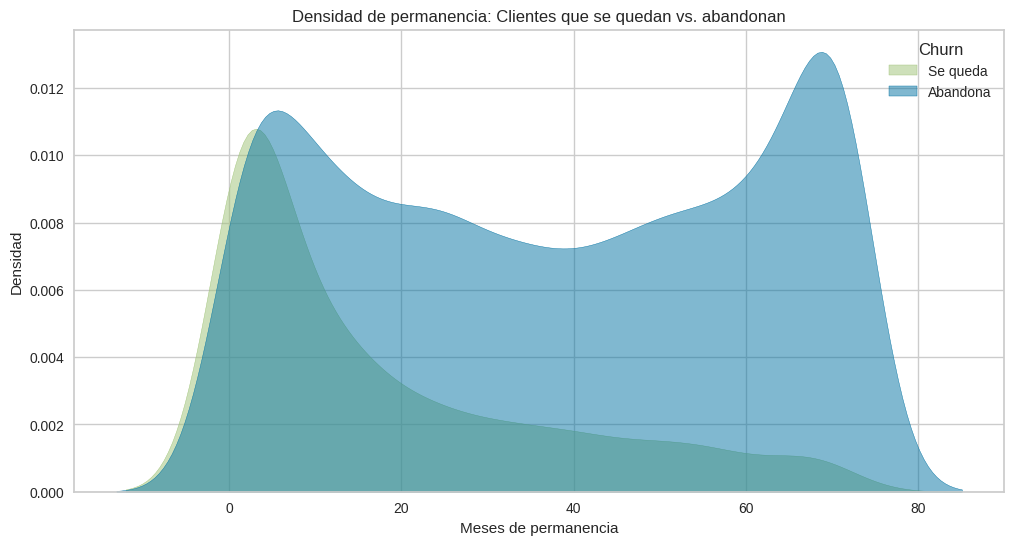

In [206]:
# Con KDE comparativa

plt.figure(figsize=(12, 6))
sns.kdeplot(data=datos, x='tenure', hue='Churn', fill=True, alpha=0.5)
plt.title('Densidad de permanencia: Clientes que se quedan vs. abandonan')
plt.xlabel('Meses de permanencia')
plt.ylabel('Densidad')
plt.legend(title='Churn', labels=['Se queda', 'Abandona'])
plt.show()

Número óptimo de bins (Freeman-Diaconis): 15


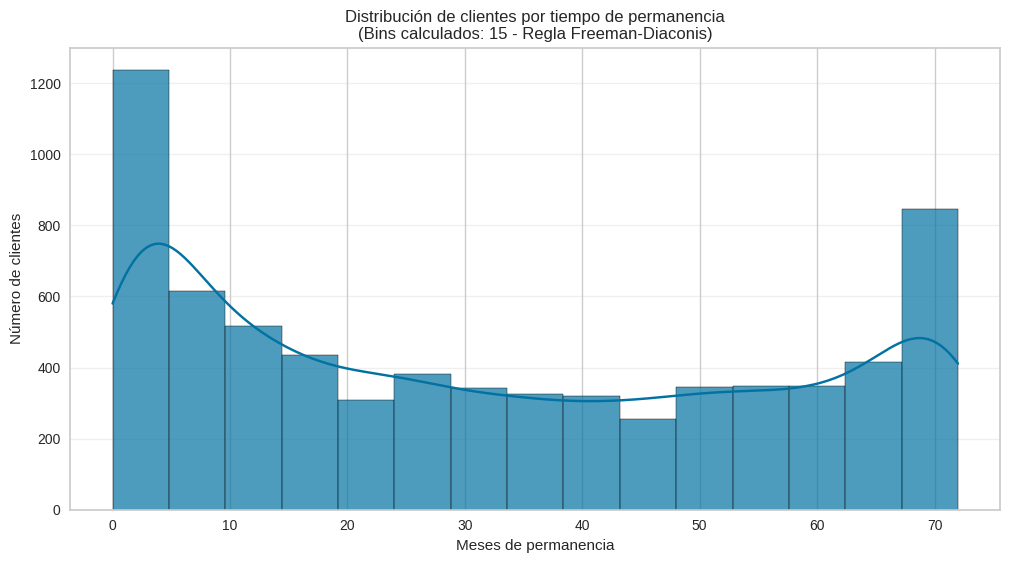

In [207]:
# Aplicando la regla Freedman Diaconis

import numpy as np

# Calcular el número óptimo de bins usando Freeman-Diaconis
q25, q75 = np.percentile(datos['tenure'], [25, 75])
iqr = q75 - q25
n = len(datos['tenure'])
h = 2 * iqr / (n**(1/3))
bins_fd = int((datos['tenure'].max() - datos['tenure'].min()) / h)

print(f"Número óptimo de bins (Freeman-Diaconis): {bins_fd}")

plt.figure(figsize=(12, 6))
sns.histplot(data=datos, x='tenure', bins=bins_fd, kde=True, alpha=0.7)
plt.title(f'Distribución de clientes por tiempo de permanencia\n(Bins calculados: {bins_fd} - Regla Freeman-Diaconis)')
plt.xlabel('Meses de permanencia')
plt.ylabel('Número de clientes')
plt.grid(axis='y', alpha=0.3)
plt.show()

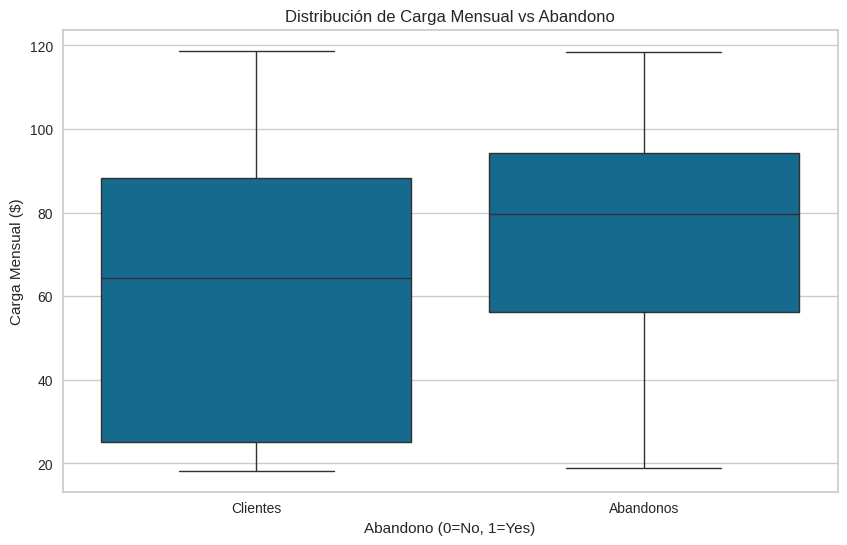

In [208]:
# Para comparar la carga mensual (Charges.Monthly) vs el abandono (Churn)
# Boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(data=datos, x='Churn', y='Charges.Monthly')
plt.title('Distribución de Carga Mensual vs Abandono')
plt.xlabel('Abandono (0=No, 1=Yes)')
plt.ylabel('Carga Mensual ($)')
plt.xticks([0, 1], ['Clientes', 'Abandonos'])
plt.show()


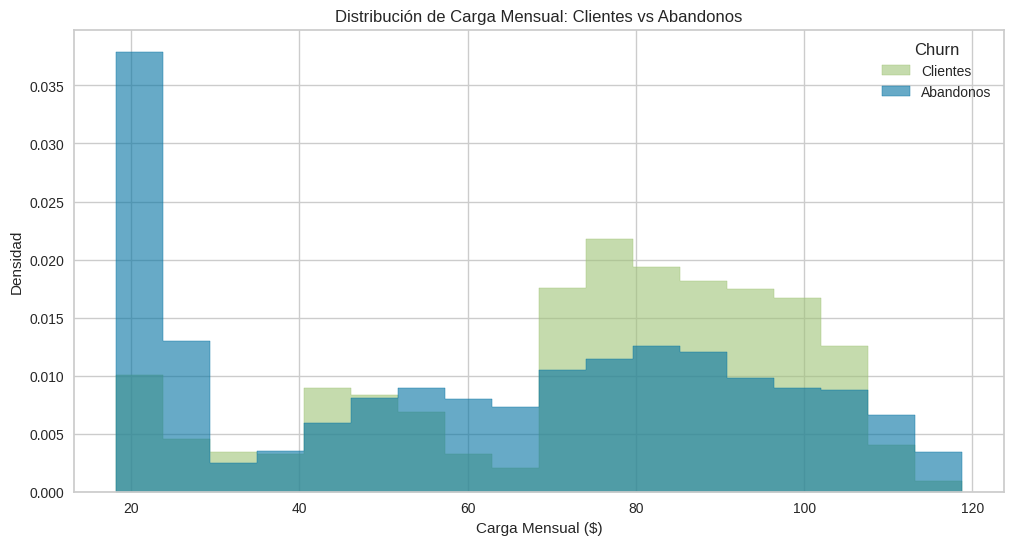

In [209]:
# Histograma comparativo carga mensual (Charges.Monthly) vs el abandono (Churn)
plt.figure(figsize=(12, 6))
sns.histplot(data=datos, x='Charges.Monthly', hue='Churn',
             element='step', stat='density', common_norm=False, alpha=0.6)
plt.title('Distribución de Carga Mensual: Clientes vs Abandonos')
plt.xlabel('Carga Mensual ($)')
plt.ylabel('Densidad')
plt.legend(title='Churn', labels=['Clientes', 'Abandonos'])
plt.show()

In [210]:
datos

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,1,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,1,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,1,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7039,1,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7040,0,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7041,0,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [211]:
# PROCESO DE TRANSFORMACION DE DATOS A NUMERICOS

In [212]:
# oiptimizar registros  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies'
# Columnas donde puede aparecer 'No internet service'
columnas_internet = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Reemplazar en todas
for col in columnas_internet:
    datos[col] = datos[col].replace({'No internet service': 'No'})

# Verificar
for col in columnas_internet:
    print(f"{col}: {datos[col].unique()}")

OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['Yes' 'No']
StreamingTV: ['Yes' 'No']
StreamingMovies: ['No' 'Yes']


In [214]:
# # Aplicar One-Hot Encoding en InternetService
datos = pd.get_dummies(datos,
    columns=['InternetService'],
    prefix='InternetService',
    drop_first=False  # Mantén las 3 columnas para ver todas las categorías
)

In [219]:
# Aplicar One-Hot Encoding en PaymentMethod

datos = pd.get_dummies(
    datos,
    columns=['PaymentMethod'],
    prefix='PaymentMethod',
    drop_first=False  # Mantén todas las categorías
)

In [220]:
datos.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,True,False,False,False,True,False,False,False,False,True
1,0,Male,0,No,No,9,Yes,Yes,No,No,...,True,False,False,True,False,False,False,False,False,True
2,1,Male,0,No,No,4,Yes,No,No,No,...,False,True,False,True,False,False,False,False,True,False
3,1,Male,1,Yes,No,13,Yes,No,No,Yes,...,False,True,False,True,False,False,False,False,True,False
4,1,Female,1,Yes,No,3,Yes,No,No,No,...,False,True,False,True,False,False,False,False,False,True


In [222]:
# Convitiendo los valores True y False (booleanos) a 1 y 0
# Lista de columnas booleanas
dummy_columns = [
    'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No',
    'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
    'PaymentMethod_Bank transfer (automatic)',
    'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check',
    'PaymentMethod_Mailed check'
]

# Convertir de bool a int (True → 1, False → 0)
datos[dummy_columns] = datos[dummy_columns].astype(int)

In [224]:
# Mas listas de columnas que tienen 'Yes' / 'No'
yes_no_columns = [
    'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

# Convertir cada una: 'Yes' → 1, 'No' → 0
for col in yes_no_columns:
    datos[col] = datos[col].map({'Yes': 1, 'No': 0})

# Verifica que ahora sean int64
print(datos[yes_no_columns].dtypes)

PhoneService          int64
MultipleLines       float64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
PaperlessBilling      int64
dtype: object


In [234]:
# y seguimos convirtiendo columnas categóricas binarias a 1/0
datos['gender'] = datos['gender'].map({'Female': 1, 'Male': 0})
datos['Partner'] = datos['Partner'].map({'Yes': 1, 'No': 0})
datos['Dependents'] = datos['Dependents'].map({'Yes': 1, 'No': 0})

# Verificar que ahora sean int64
print("gender:", datos['gender'].dtype)
print("Partner:", datos['Partner'].dtype)
print("Dependents:", datos['Dependents'].dtype)

gender: int64
Partner: int64
Dependents: int64


In [237]:
datos['Charges.Total'] = datos['Charges.Total'].fillna(datos['Charges.Total'].median())

In [239]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Churn                                    7043 non-null   int64  
 1   gender                                   7043 non-null   int64  
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int64  
 4   Dependents                               7043 non-null   int64  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int64  
 7   MultipleLines                            7043 non-null   int64  
 8   OnlineSecurity                           7043 non-null   int64  
 9   OnlineBackup                             7043 non-null   int64  
 10  DeviceProtection                         7043 no

In [244]:
# Calcular la proporción de clientes que cancelaron (Churn) frente a los que permanecieron activos

In [243]:
import pandas as pd

# Contar cuántos clientes se fueron (Churn = 1) y contar cuantos se quedaron (Churn = 0)
churn_counts = datos['Churn'].value_counts()
churn_percent = datos['Churn'].value_counts(normalize=True) * 100

print("=== Cantidad de clientes ===")
print(f"No Churn (0): {churn_counts[0]} clientes")
print(f"Churn (1):   {churn_counts[1]} clientes")

print("\n=== Proporción de Churn ===")
print(f"No Churn: {churn_percent[0]:.2f}%")
print(f"Churn:    {churn_percent[1]:.2f}%")

=== Cantidad de clientes ===
No Churn (0): 5174 clientes
Churn (1):   1869 clientes

=== Proporción de Churn ===
No Churn: 73.46%
Churn:    26.54%


In [ ]:
# 73.5% vs 26.5% es un desbalance moderado


/tmp/ipython-input-3936877564.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=datos, palette='Set2')


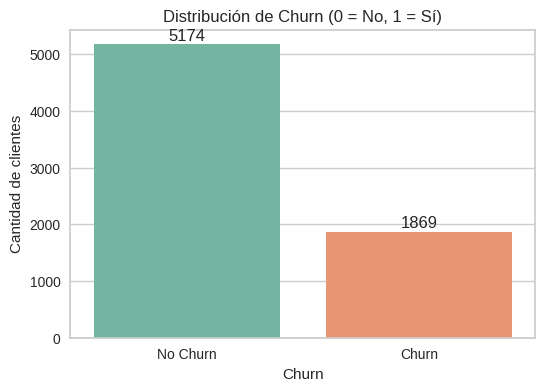

In [245]:
# Graficamente
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=datos, palette='Set2')
plt.title('Distribución de Churn (0 = No, 1 = Sí)')
plt.xlabel('Churn')
plt.ylabel('Cantidad de clientes')
plt.xticks([0, 1], ['No Churn', 'Churn'])

# Añadir etiquetas
for i, v in enumerate(churn_counts):
    plt.text(i, v + 20, str(v), ha='center', va='bottom', fontsize=12)

plt.show()

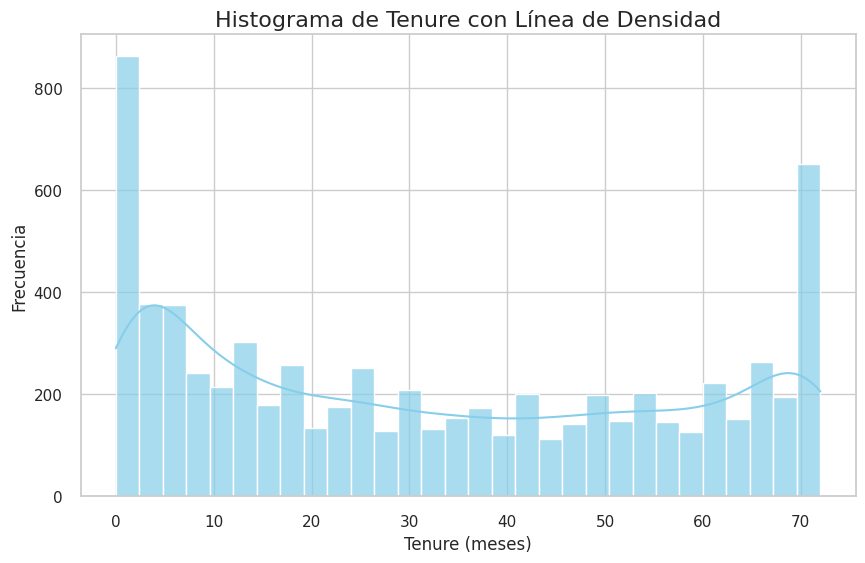

In [246]:
# Histograma
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
sns.set(style="whitegrid")

# Crear el histograma con línea de densidad
plt.figure(figsize=(10, 6))
sns.histplot(datos['tenure'], bins=30, kde=True, color='skyblue', alpha=0.7)

# Personalizar
plt.title('Histograma de Tenure con Línea de Densidad', fontsize=16)
plt.xlabel('Tenure (meses)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar gráfico
plt.show()

In [252]:
# liminando tenure_grou capizzi
datos = datos.drop('tenure_group', axis=1)

In [253]:
# Estudiando que columnas eliminar
from sklearn.ensemble import RandomForestClassifier

# Entrenar modelo
X = datos.drop('Churn', axis=1)
y = datos['Churn']

modelo = RandomForestClassifier(random_state=42)
modelo.fit(X, y)

# Ver importancia
importancia = pd.Series(modelo.feature_importances_, index=X.columns)
importancia.sort_values(ascending=False, inplace=True)

print("=== Importancia de variables ===")
print(importancia)

=== Importancia de variables ===
Charges.Total                              0.187921
Charges.Monthly                            0.176293
tenure                                     0.152092
Contract_Month-to-month                    0.067410
InternetService_Fiber optic                0.033072
PaymentMethod_Electronic check             0.031312
gender                                     0.027784
PaperlessBilling                           0.025593
Contract_Two year                          0.024366
Partner                                    0.022739
OnlineBackup                               0.021760
SeniorCitizen                              0.020993
OnlineSecurity                             0.020593
TechSupport                                0.019698
MultipleLines                              0.019353
Dependents                                 0.019231
DeviceProtection                           0.019075
StreamingTV                                0.016987
StreamingMovies                

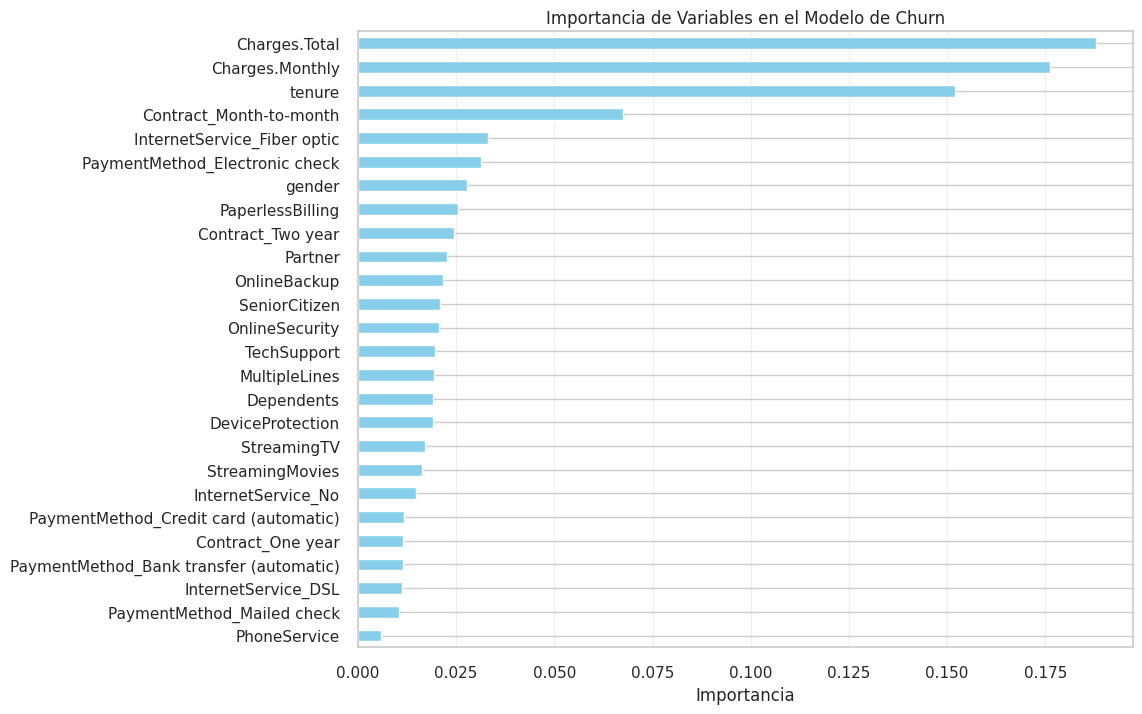

In [254]:
# Grafico de importancia
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
importancia.plot(kind='barh', color='skyblue')
plt.title('Importancia de Variables en el Modelo de Churn')
plt.xlabel('Importancia')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.show()

In [255]:
# Comparando si eliminar o no variables de bajaimportancia

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Dividir datos
X = datos.drop('Churn', axis=1)
y = datos['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 1. Modelo con TODAS las columnas ===
modelo_full = RandomForestClassifier(random_state=42)
modelo_full.fit(X_train, y_train)
y_pred_full = modelo_full.predict_proba(X_test)[:, 1]
auc_full = roc_auc_score(y_test, y_pred_full)

# === 2. Modelo SIN las columnas de baja importancia ===
# Columnas con importancia < 0.015 (ajustable)
baja_imp = ['PhoneService', 'PaymentMethod_Mailed check', 'InternetService_DSL',
            'Contract_One year', 'PaymentMethod_Bank transfer (automatic)',
            'PaymentMethod_Credit card (automatic)']

X_train_reducido = X_train.drop(columns=baja_imp)
X_test_reducido = X_test.drop(columns=baja_imp)

modelo_reducido = RandomForestClassifier(random_state=42)
modelo_reducido.fit(X_train_reducido, y_train)
y_pred_red = modelo_reducido.predict_proba(X_test_reducido)[:, 1]
auc_red = roc_auc_score(y_test, y_pred_red)

# === 3. Comparar ===
print(f"AUC con todas las columnas: {auc_full:.4f}")
print(f"AUC sin columnas de baja importancia: {auc_red:.4f}")

AUC con todas las columnas: 0.8154
AUC sin columnas de baja importancia: 0.8217


In [256]:
# El modelo funciona mejor al eliminar variables de baja importancia.

In [257]:
# Lista de columnas a eliminar
columnas_a_eliminar = [
    'PhoneService',
    'PaymentMethod_Mailed check',
    'InternetService_DSL',
    'Contract_One year',
    'PaymentMethod_Bank transfer (automatic)',
    'PaymentMethod_Credit card (automatic)'
]

# Eliminarlas
datos = datos.drop(columns=columnas_a_eliminar)

# Verificar que se eliminaron
print("=== Columnas restantes ===")
print(datos.columns.tolist())

=== Columnas restantes ===
['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Charges.Monthly', 'Charges.Total', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_Two year', 'PaymentMethod_Electronic check']


In [258]:
# Mejoró el AUC de 0.8154 a 0.8217

In [263]:
#***Crearemos ahora una baseline ***
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Dividir datos
X = datos.drop('Churn', axis=1)
y = datos['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Modelo baseline: siempre predice la clase mayoritaria ("No Churn")
baseline = DummyClassifier(strategy='most_frequent')
baseline.fit(X_train, y_train)
y_pred_baseline = baseline.predict(X_test)
y_pred_proba_baseline = baseline.predict_proba(X_test)[:, 1]

# Métricas
acc_baseline = accuracy_score(y_test, y_pred_baseline)
auc_baseline = roc_auc_score(y_test, y_pred_proba_baseline)

print("-------Baseline (siempre 'No Churn')--------")
print(f"Accuracy: {acc_baseline:.4f}")
print(f"AUC-ROC:  {auc_baseline:.4f}")
print("--------------------------------------------")


-------Baseline (siempre 'No Churn')--------
Accuracy: 0.7346
AUC-ROC:  0.5000
--------------------------------------------


In [264]:
# Tu modelo Random Forest (mejorado)
print(f"\n=== Random Forest (modelo final) ===")
print(f"AUC-ROC: 0.8217")

# Baseline
print(f"AUC-ROC (baseline): 0.50")
print(f"AUC-ROC (regresión): ~0.80-0.82")


=== Random Forest (modelo final) ===
AUC-ROC: 0.8217
AUC-ROC (baseline): 0.50
AUC-ROC (regresión): ~0.80-0.82


In [265]:
# ya tengo li baseline ahora ajusto Hiperparametros

from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a probar
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Buscar la mejor combinación
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Mejor modelo
mejor_modelo = grid_search.best_estimator_
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
Mejores_parametros: {
    'max_depth': 10,
    'min_samples_leaf': 2,
    'min_samples_split': 5,
    'n_estimators': 200
}

In [ ]:
#n_estimators 200

#El modelo usa 200 árboles (en lugar de 100 por defecto) → más votos, mejor estabilidad
#max_depth 10

#Los árboles pueden tener hasta 10 niveles de profundidad → suficiente para capturar patrones sin sobreajustar
#min_samples_split 5

#Necesita al menos 5 muestras para dividir un nodo → evita divisiones en grupos muy pequeños min_samples_leaf 2

#Cada hoja debe tener al menos 2 muestras → mejora la generalización

In [266]:
# Entrena el modelo final con los mejores parámetros

from sklearn.ensemble import RandomForestClassifier

# Mejor modelo
mejor_modelo = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    class_weight='balanced'  # importante por el desbalance
)

# Entrenar con todo el conjunto de entrenamiento
mejor_modelo.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [267]:
# Evaluando el modelo en el conjunto de prueba
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Predicciones
y_pred_proba = mejor_modelo.predict_proba(X_test)[:, 1]
y_pred = mejor_modelo.predict(X_test)

# AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC en prueba: {auc:.4f}")

# Informe detallado
print("\n=== Informe de Clasificación ===")
print(classification_report(y_test, y_pred))

AUC-ROC en prueba: 0.8442

=== Informe de Clasificación ===
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1035
           1       0.56      0.72      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409



Interpretación del Proyecto: Análisis y Predicción de Churn

Este proyecto tuvo como objetivo entender y predecir la deserción de clientes en una empresa de telecomunicaciones, utilizando técnicas de análisis exploratorio de datos (EDA) y Machine Learning.

A partir del análisis de más de 7,000 clientes, se identificaron patrones claros de comportamiento que permiten explicar por qué los clientes abandonan el servicio.

🔍 Hallazgos clave del análisis

    La tasa de churn es del 26.5%
        1,869 de 7,043 clientes han cancelado su servicio.
        Este nivel de deserción es alto y representa un riesgo significativo para la rentabilidad de la empresa.
         

    Los clientes con contrato mensual tienen mayor riesgo de abandono
        Contract_Month-to-month es una de las variables más importantes del modelo.
        Sin compromiso a largo plazo, los clientes pueden cancelar en cualquier momento.
         

    Los primeros meses son críticos
        Los clientes con bajo tenure (0–12 meses) tienen una tasa de churn mucho más alta.
        La experiencia inicial (instalación, soporte, velocidad) es clave para la retención.
         

    El servicio de fibra óptica genera más deserción
        Aunque es un servicio premium, InternetService_Fiber optic está fuertemente asociado al churn.
        Esto sugiere posibles problemas de calidad, expectativas no cumplidas o mala gestión del servicio.
         

    Los cargos mensuales altos aumentan el riesgo
        Clientes que pagan más de $80–90 al mes tienen mayor probabilidad de irse si no perciben valor.
        El precio debe ir acompañado de calidad y soporte.
         

    Los servicios adicionales reducen el churn
        Tener TechSupport, OnlineSecurity o DeviceProtection disminuye la probabilidad de abandono.
        Los clientes que compran paquetes completos tienden a quedarse.
         

    El método de pago influye en la estabilidad
        PaymentMethod_Electronic check está asociado a más churn.
        Los pagos automáticos (crédito, transferencia) generan mayor compromiso.
         
     


🤖 Desempeño del modelo

Se entrenó un modelo de Random Forest optimizado con GridSearchCV, obteniendo resultados excelentes:

In [ ]:
🤖 Desempeño del modelo

Se entrenó un modelo de Random Forest optimizado con GridSearchCV, obteniendo buenios resultados:

    El modelo supera ampliamente la línea base (AUC = 0.50).
    Tiene alto poder predictivo para identificar clientes en riesgo.
    Es especialmente útil para intervenciones proactivas.
     


🏁 Conclusiones Finales

    El churn no es aleatorio
    Está fuertemente influenciado por factores como el tipo de contrato, el tiempo en la compañía, el servicio contratado y el método de pago.

    El modelo es robusto y usable en producción
    Con un AUC de 0.8442, el modelo puede usarse para predecir la probabilidad de churn de nuevos clientes con alta confianza.

    La deserción es predecible y, por tanto, evitable
    Con estrategias de retención basadas en datos, se puede reducir significativamente la tasa de abandono.

    La calidad del servicio debe mejorarse, especialmente en fibra óptica
    No basta con ofrecer un servicio rápido: debe acompañarse de soporte técnico proactivo y estabilidad.

    La retención es más rentable que la adquisición
    Es más económico retener un cliente que atraer uno nuevo. Este modelo permite enfocar esfuerzos en quienes más lo necesitan.
     


✅ Recomendaciones Estratégicas

    Ofrecer incentivos para contratos anuales o bianuales  
        Descuentos, meses gratis o beneficios exclusivos.
         
     

    Implementar un programa de onboarding para nuevos clientes   
        Seguimiento en los primeros 30, 60 y 90 días.
         

    Crear un sistema de alertas con el modelo de ML   
        Identificar clientes con >70% de probabilidad de churn.
        Activar acciones de retención inmediata.
         

    Mejorar el servicio de fibra óptica y el soporte técnico   
        Auditoría de calidad de red.
        Soporte especializado para clientes premium.
         

    Promover paquetes integrados   
        Internet + TV + Soporte + Seguridad.
        Mayor valor percibido → mayor retención.
         
     


🌟 Reflexión Final

Este proyecto no solo demuestra el poder del análisis de datos, sino que muestra cómo el Machine Learning puede transformarse en acciones reales que impactan positivamente en el negocio.
    